In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris = pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.drop(columns = 'Id', inplace =  True)

In [ ]:
iris.groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
iris.SepalLengthCm.nunique()
iris.SepalWidthCm.nunique()

iris.PetalLengthCm.nunique()

iris.PetalWidthCm.nunique()

22

In [ ]:
iris.rename(columns = {'SepalLengthCm': 'Sepal_Length_Cm', 'SepalWidthCm': 'Sepal_Width_Cm', 'PetalLengthCm': 'Petal_Length_Cm', 'PetalWidthCm': 'Petal_Width_Cm'}, inplace = True)
iris

,Sepal_Length_Cm,Sepal_Width_Cm,Petal_Length_Cm,Petal_Width_Cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris['Species'].value_counts()


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


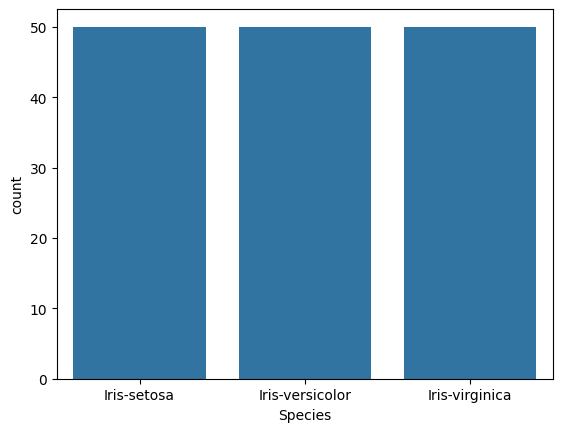

In [ ]:
sns.countplot(x = 'Species', data = iris);

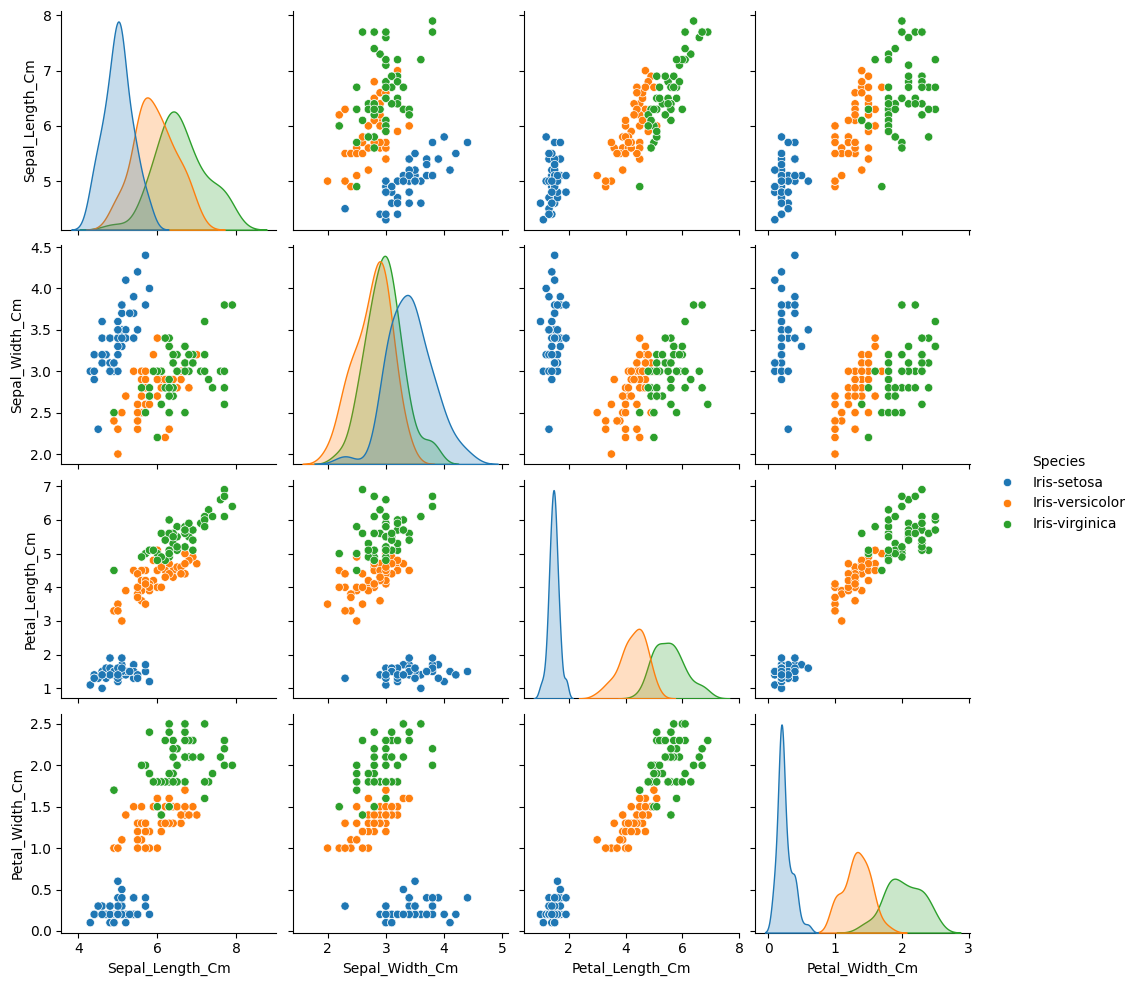

In [ ]:
sns.pairplot(iris, hue = 'Species')

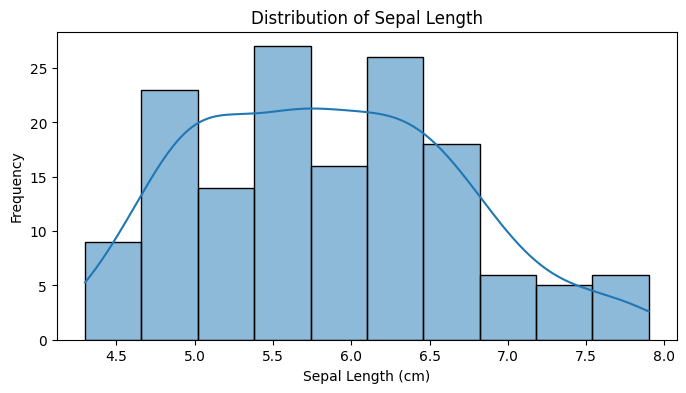

In [ ]:
plt.figure(figsize = (8, 4))
sns.histplot(iris['Sepal_Length_Cm'], kde = True, bins = 10)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

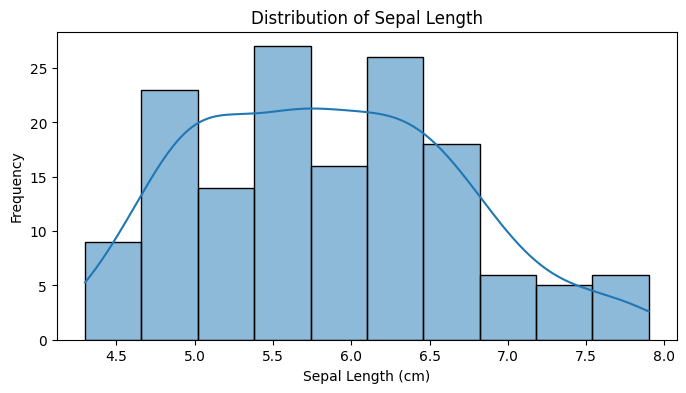

In [ ]:
plt.figure(figsize = (8, 4))
sns.histplot(iris['Sepal_Length_Cm'], kde = True, bins = 10)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

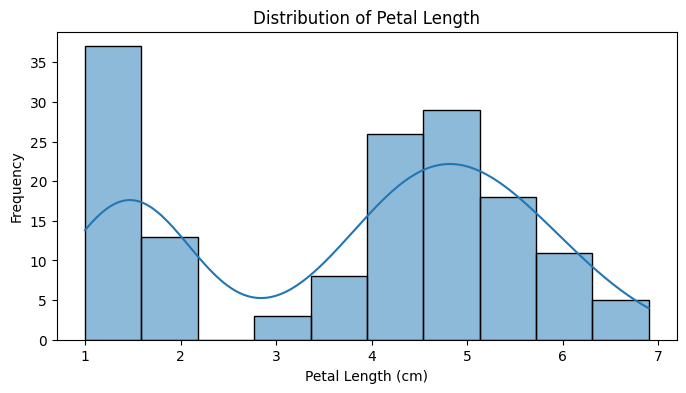

In [ ]:
plt.figure(figsize = (8, 4))
sns.histplot(iris['Petal_Length_Cm'], kde = True, bins = 10)
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

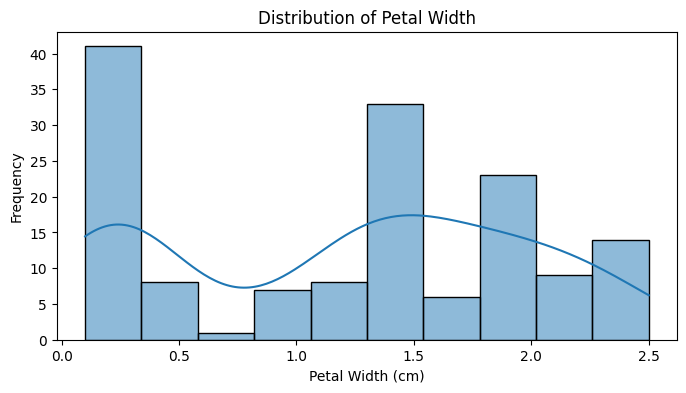

In [ ]:
plt.figure(figsize = (8, 4))
sns.histplot(iris['Petal_Width_Cm'], kde = True, bins = 10)
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

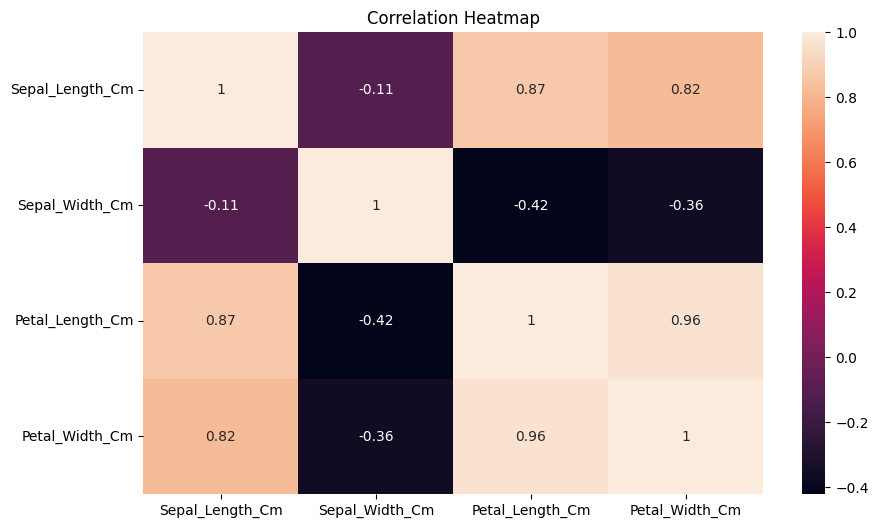

In [ ]:
numeric_iris = iris.select_dtypes(include = [np.number])
iris.dropna(inplace = True)
plt.figure(figsize = (10, 6))
sns.heatmap(numeric_iris.corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = iris.drop(columns = ['Species'])
y = iris['Species']

#split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.1, random_state=0)

In [ ]:
train_preds_svm = svm.predict(X_train)
test_preds_svm = svm.predict(X_test)
# Accuracy
print("Training Accuracy:", accuracy_score(y_train, train_preds_svm))
print("Testing Accuracy:", accuracy_score(y_test, test_preds_svm))

Training Accuracy: 0.9666666666666667
Testing Accuracy: 1.0


In [ ]:
print("Classification Report for Testing Data:")
print(classification_report(y_test, test_preds_svm))

Classification Report for Testing Data:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



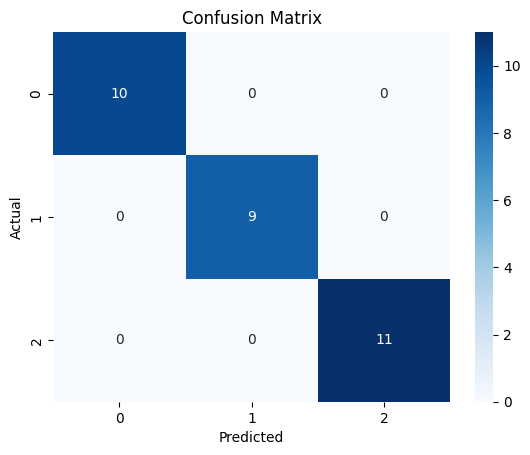

In [ ]:
sns.heatmap(confusion_matrix(y_test, test_preds_svm), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
train_preds_knn = knn.predict(X_train)
test_preds_knn = knn.predict(X_test)
# Accuracy
print("Training Accuracy:", accuracy_score(y_train, train_preds_knn))
print("Testing Accuracy:", accuracy_score(y_test, test_preds_knn))

Training Accuracy: 0.9666666666666667
Testing Accuracy: 1.0


In [ ]:
print("Classification Report for Testing Data:")
print(classification_report(y_test, test_preds_svm))

Classification Report for Testing Data:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



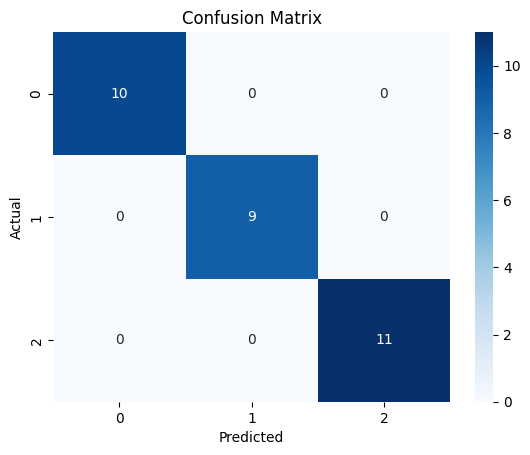

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, test_preds_svm), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = knn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
